In [19]:

print("Loading...")

import requests

from cloudant.client import Cloudant

from cloudant.error import CloudantException

from cloudant.result import Result, ResultByKey, QueryResult

import pandas as pd

from pandas import DataFrame, read_csv

import numpy as np

import json

from cloudant.query import Query

from cloudant.database import CloudantDatabase

import networkx as nx

import matplotlib.pyplot as plt

import pandas as pd

from datetime import datetime
from cloudant.client import Cloudant
import pandas as pd



#edit your file path

#wl = pd.read_csv("C:/Users/MuhammadZafar/Downloads/WaterLevel.csv")

#mf = pd.read_csv("C:/Users/MuhammadZafar/Downloads/MainFlows.csv")




# credentials
username = "55a48b3d-bd73-4b30-bd83-f94f512f3796-bluemix"
password = "5ee4b592bde6be1061b1e52f7d2e5b2af0045f590cb6820184afbac27e102021"
urls = "https://" + username + ":" + password + "@" + username + ".cloudant.com"

client = Cloudant(username, password, url=urls)
client.connect()
print("Cloudant Connected!")
# Open an existing database
db_name = ['mainflow','waterlevel','sink']
mainflowtemp = client[db_name[0]]
waterleveltemp = client[db_name[1]]
sinktemp = client[db_name[2]]

save_file = False 


class Reserve:

    

    def __init__(self, node_id,name,capacity,level,inflow,inflow_cap,outflow,outflow_cap,long,lat,weight):

        

        self.node_id = node_id

        self.name = name

        self.capacity = capacity

        self.level = level

        self.inflow = inflow

        self.inflow_cap = inflow_cap

        self.outflow = outflow

        self.outflow_cap = outflow_cap

        self.long = long

        self.lat = lat

        self.weight = weight

        

    def describe(self):

        

        print(self.node_id,self.name,self.capacity,self.level,self.inflow,self.inflow_cap,self.outflow,self.outflow_cap,self.long,self.lat)

    

    

    def rain(self,level): 

        self.level += level

        self.describe()

        if self.level >= self.capacity * 0.9:

            print("Overflow Warning at " + self.name)

            self.checkCap(res);

            return;

        
    def checkCap(self,res):    

        if res[self.node_id].level <= res[self.node_id].capacity * 0.5:

            print("Moving water to " + res[self.node_id].name)

            self.level -= 300

            res[self.node_id].level += 300

            self.describe()

            res[self.node_id].describe()

            return;

       
options = {

'node_color' : 'green',

'node_size' : 100,

'width' : 3,

'with_labels' : True



}

def update_flow(G):
    for u,v,a in G.edges(data=True):
        print(u.name,v.name)
        flow[u][v]['capacity'] = (v.capacity+v.inflow-v.outflow-v.level)
        print(flow[u][v]['capacity'])
        return G

def get_predictions(weather):
    results = []
    resultstemp = []
    for i in range(len(mainflow)):
        long = round(float(mainflow[i]['LongitudeField']),3)
        lat  = round(float(mainflow[i]['LatitudeField']),3)
        results.append(get_weather(lat, long))

        if results[i] != False:
            resultstemp.append(json.loads(str(results[i])))
            print(mainflow[i]['NodeField'])
            weather[mainflow[i]['NodeField']] =  display_weather(resultstemp[i])            
        else:
            print('Something went wrong :-(') 
    return weather

#weather API
def get_weather(lat,long):
    username = '5deff39b-b3ba-4731-a0f3-ee1ee2352868'
    password = 'tW04Lpv1CE'
    watsonUrl = 'https://twcservice.au-syd.mybluemix.net/api/weather/v1/geocode/{}/{}/forecast/hourly/48hour.json'.format(lat,long)
 
    try:
        r = requests.get(watsonUrl,auth=(username,password))
        return r.text
    except:
        return False
    
    
def display_weather(results):
    data = {}
    i =0
    for x in results['forecasts']:
        i = i + 1
        data[i] = [x['pop'],x['qpf'],x['severity'],x['phrase_32char']]
    return data





def to_dict(y):
    data = {}
    for ind, document in enumerate(y):
        one_doc = dict(document)
        data[ind]= one_doc
    return data

mainflow ={}
waterlevel = {}
sink = {}


sink = to_dict(sinktemp)
mainflow =to_dict(mainflowtemp)
waterlevel = to_dict(waterleveltemp)







res = []

for i in range(len(mainflow)):

    for j in range(len(waterlevel)):

        if(mainflow[i]['NodeField'] == waterlevel[j]['Namefield']):

            temp = []

            temp =  Reserve(j+1,                     #node_id

                            mainflow[i]['NodeField'], #name

                            float(mainflow[i]['CapacityField']),  #capacity

                            float(waterlevel[j]['WaterLevelfield']),  #level

                            float(mainflow[i]['In FlowField']), #inflow

                            350,  #outflow cap

                            float(mainflow[i]['OutFlowField']),  #outflow

                            350,      #outflow cap

                            float(mainflow[i]['LongitudeField']),  

                            float(mainflow[i]['LatitudeField']),   

                            float(mainflow[i]['weightField']))     #weight

                            

            res.append(temp)       

            


#weather data retrieval
weather = {}
weather = get_predictions(weather)
    




Loading...
Cloudant Connected!
Tarbela Dam
Kalabagh Dam
Mainwali
Chashma Dam
DeraIsmailKhan
Tunsa Dam
Laiquatpur
JoiningStage
Guddu
Sukkar Barrage
Sukkar 
khairpur
Kotri Dam
Mangla Dam
Rasul Barrage
Qadirabad Barrage
Trimmu Barrage
Panjnad Cannal
ArabianSea


In [20]:
# import networkx as nx
# import matplotlib.pyplot as plt
# import pandas as pd

# #edit your file path
# wl = pd.read_csv(r"C:\Users\MuhammadAhmed\Desktop\OptimizedNetworkFlow-Muhammadusmanzafar-patch-1\WaterLevel.csv")
# mf = pd.read_csv(r"C:\Users\MuhammadAhmed\Desktop\OptimizedNetworkFlow-Muhammadusmanzafar-patch-1\MainFlows.csv")


# class Reserve:
    
#     def __init__(self, node_id,name,capacity,level,inflow,inflow_cap,outflow,outflow_cap,long,lat):
        
#         self.node_id = node_id
#         self.name = name
#         self.capacity = capacity
#         self.level = level
#         self.inflow = inflow
#         self.inflow_cap = inflow_cap
#         self.outflow = outflow
#         self.outflow_cap = outflow_cap
#         self.long = long
#         self.lat = lat
        
#     def describe(self):
        
#         print(self.node_id,self.name,self.capacity,self.level,self.inflow,self.inflow_cap,self.outflow,self.outflow_cap,self.long,self.lat)
    
    
#     def rain(self,level):
        
#         self.level += level
#         self.describe()
        
#         if self.level == self.capacity:
#             print("Flood Imminent at " + self.name)
        
#         elif self.level >= self.capacity * 0.9:
#             print("Flood Warning at " + self.name)
#             self.checkCap(res);
           
#         elif self.level >= self.capacity * 0.7:
#             print("Consider moving water from " + self.name)
            
#         elif self.level >= self.capacity * 0.5:
#             print("Stable Waters")
#             return;
        
    
#     def checkCap(self,res):    
               
#         if (res[self.node_id].level <= res[self.node_id].capacity * 0.5) and (res[self.node_id].outflow <= res[self.node_id].capacity * 0.5):
            
#             print("Moving water to " + res[self.node_id].name)
#             self.level -= 300
#             self.outflow += 50
            
#             res[self.node_id].level += 300
#             res[self.node_id].inflow += 50
        
#             self.describe()
#             res[self.node_id].describe()
            
            
#             return;
       


# res = []
# for i in range(len(mf)):
#     for j in range(len(wl)):
#         if(mf.iloc[:,2][i] == wl.iloc[:,2][j]):
#             temp = []
#             temp =  Reserve(j+1,                     #node_id
#                             mf.iloc[:,2][i],         #name
#                             float(mf.iloc[:,3][i]),  #capacity
#                             float(wl.iloc[:,3][j]),  #level
#                             float(mf.iloc[:,4][i]),  #inflow
#                             float(mf.iloc[:,18][i]), #outflow cap
#                             float(mf.iloc[:,5][i]),  #outflow
#                             float(mf.iloc[:,19][i]), #outflow cap
#                             float(mf.iloc[:,12][i]), #long
#                             float(mf.iloc[:,13][i])) #lat
#             res.append(temp)       

    
    
flow=nx.DiGraph() # make a directed graph (digraph)

# print(res[0])
# print(len(res))
for i in res:
#     print(i)
    flow.add_node(i)
    
# flow.add_path(res)

flow.add_edge(res[0],res[1],capacity =(res[1].capacity+res[1].inflow-res[1].outflow-res[1].level))
flow.add_edge(res[1],res[2],capacity =(res[2].capacity+res[2].inflow-res[2].outflow-res[2].level))
flow.add_edge(res[2],res[3],capacity=(res[3].capacity+res[3].inflow-res[3].outflow-res[3].level))
flow.add_edge(res[3],res[4],capacity=(res[4].capacity+res[4].inflow-res[4].outflow-res[4].level))
flow.add_edge(res[4],res[5],capacity=(res[5].capacity+res[5].inflow-res[5].outflow-res[5].level))
flow.add_edge(res[5],res[6],capacity=(res[6].capacity+res[6].inflow-res[6].outflow-res[6].level))
flow.add_edge(res[7],res[8],capacity=(res[8].capacity+res[8].inflow-res[8].outflow-res[8].level))
flow.add_edge(res[8],res[9],capacity=(res[9].capacity+res[9].inflow-res[9].outflow-res[9].level))
flow.add_edge(res[9],res[10],capacity=(res[10].capacity+res[10].inflow-res[10].outflow-res[10].level))
flow.add_edge(res[10],res[11],capacity=(res[11].capacity+res[11].inflow-res[11].outflow-res[11].level))
flow.add_edge(res[11],res[4],capacity=(res[4].capacity+res[4].inflow-res[4].outflow-res[4].level))



In [16]:
flow_value, flow_dict = nx.maximum_flow(flow, i, res[6])
print(type(flow_dict))
for key, value in flow_dict.items():
    if(flow_value>rain):
        if((key.capacity-key.level)>rain):
            key.capacity = key.capacity + rain
            flow = update_flow(flow)
    else
        print('It will flood now! Find the area with minimum damage')

<class 'dict'>
Tarbela Dam {<__main__.Reserve object at 0x0000021D01873630>: 0}
Kalabagh Dam {<__main__.Reserve object at 0x0000021D01928358>: 0}
Chashma Dam {<__main__.Reserve object at 0x0000021D01928400>: 0}
Tunsa Dam {<__main__.Reserve object at 0x0000021D01928320>: 0}
Guddu {<__main__.Reserve object at 0x0000021D01928438>: 803.5}
Sukkar Barrage {<__main__.Reserve object at 0x0000021D01928470>: 803.5}
Kotri Dam {}
Mangla Dam {<__main__.Reserve object at 0x0000021D019284E0>: 0}
Rasul Barrage {<__main__.Reserve object at 0x0000021D01928518>: 0}
Qadirabad Barrage {<__main__.Reserve object at 0x0000021D01928550>: 0}
Trimmu Barrage {<__main__.Reserve object at 0x0000021D01928588>: 0}
Panjnad Cannal {<__main__.Reserve object at 0x0000021D01928320>: 803.5}


TRYING TO FIND MAX FLOW PATH TO RELEASE WATER
Max flow is 781.5999999999999
Tarbela Dam Kalabagh Dam
881.5999999999999
Tarbela Dam Kalabagh Dam
881.5999999999999
Tarbela Dam Kalabagh Dam
881.5999999999999
Tarbela Dam Kalabagh Dam
881.5999999999999
Tarbela Dam Kalabagh Dam
881.5999999999999
Tarbela Dam Kalabagh Dam
881.5999999999999
Tarbela Dam Kalabagh Dam
881.5999999999999
Tarbela Dam Kalabagh Dam
881.5999999999999
Tarbela Dam Kalabagh Dam
881.5999999999999
Tarbela Dam Kalabagh Dam
881.5999999999999
Tarbela Dam Kalabagh Dam
881.5999999999999


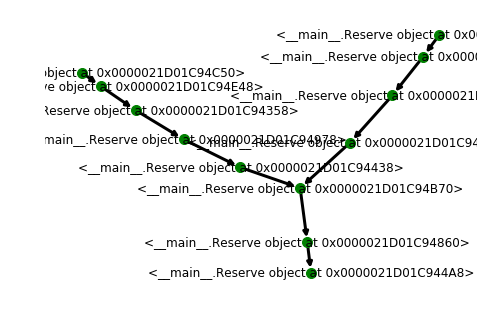

In [23]:
flow_value, flow_dict = nx.maximum_flow(flow, res[0], res[6])
# print(flow_value)
x = nx.nodes(flow)
# Assume it rained at Tarbela 100 cusecs
rain = 100
for i in  x:
#     print(i.name)
    if i.name == 'Tarbela Dam':
        if (i.capacity - i.level)> rain:
            print(i.capacity - i.level)
            i.level = i.level + i.capacity
            print('Level of {} increased by {}'.format(i.name,rain))
            print('Updating networkFlow...')
            flow = update_flow(flow)
#             sleep(2)
            print('Network Flow Update :)')
            
        else:
            flow_value, flow_dict = nx.maximum_flow(flow, i, res[6])
            print('TRYING TO FIND MAX FLOW PATH TO RELEASE WATER')
            print('Max flow is {}'.format(flow_value))
            for key, value in flow_dict.items():
                if(flow_value>rain):
                    if((key.capacity-key.level)>rain):
                        key.capacity = key.capacity + rain
                        flow = update_flow(flow)
                else:
                    print('It will flood now! Find the area with minimum damage')
    
nx.draw_spectral(flow,**options)